# 📘 Aprendizaje No Supervisado - Clustering con Dataset de Reservas de Hotel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Cargar el dataset
df = pd.read_csv(r"C:\Users\manjo\Escritorio\Inteligencia-Artificial\IA\Parcial\Hotel Reservations.csv")


In [2]:
# # Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)


In [5]:
# Excluir Booking_ID antes de codificar
df_no_id = df.drop(columns=['Booking_ID'])

# Codificación de variables categóricas (sin Booking_ID)
df_encoded = pd.get_dummies(df_no_id, drop_first=True)

# Escalado
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


In [7]:
# 3. Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)


C:\Users\manjo\AppData\Local\Temp\ipykernel_13024\2680967884.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='viridis', alpha=0.7)


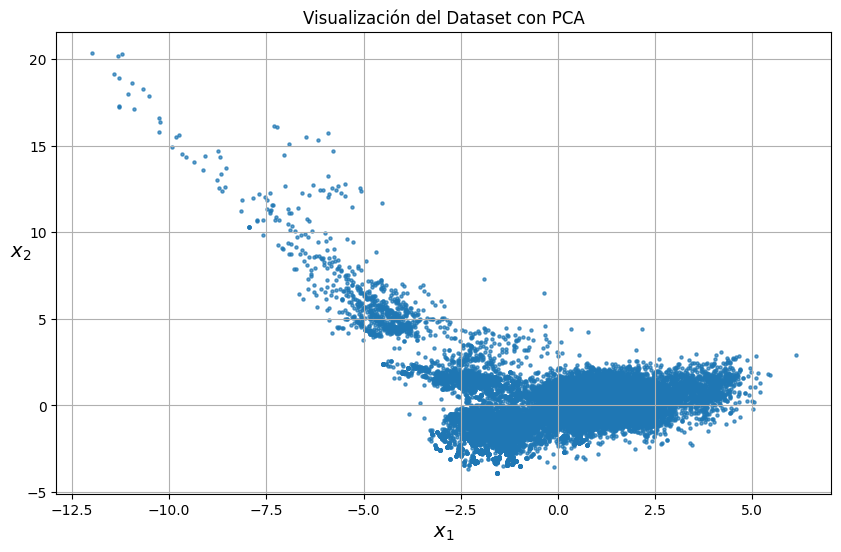

In [8]:
# 4. Función para graficar
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5, cmap='viridis', alpha=0.7)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.title("Visualización del Dataset con PCA")
    plt.grid(True)

# 5. Visualización
plt.figure(figsize=(10, 6))
plot_clusters(X_pca)
plt.show()

In [9]:
from sklearn.cluster import KMeans
import random

# Número de clusters (puedes ajustar según el método del codo) 
k = random.randint(2, 10)  # Elegir un número aleatorio entre 2 y 10

# Crear el modelo
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo con los datos escalados
y_pred = kmeans.fit_predict(df_scaled)
y_pred
#


array([3, 6, 2, ..., 2, 6, 3], dtype=int32)

In [10]:
kmeans.cluster_centers_

array([[ 1.85664678e-02, -1.88115388e-01, -1.94540866e-01,
        -1.78389891e-01, -1.46976366e-01,  8.02425445e-01,
        -6.03539896e-01,  1.06122165e-01,  7.48509718e-02,
        -1.58102800e-01, -6.16308690e-02, -8.74564568e-02,
         2.11349293e-01, -3.78209077e-01,  3.15844808e+00,
        -1.17411659e-02, -4.05849032e-01, -1.01491179e-01,
        -1.38927179e-02, -3.11076696e-01, -3.24258101e-02,
        -1.65403941e-01, -6.61412973e-02, -1.04384966e-01,
        -2.42645335e-01,  1.04966109e+00, -8.47011370e-01,
        -3.04655152e-01],
       [ 2.96972442e-01,  4.08234305e+00,  9.15595148e-02,
         1.08633372e-01,  2.00553057e-01, -2.75026840e-01,
         1.25311885e-01,  3.71991707e-02,  1.12887101e-01,
        -1.49606241e-01, -6.33932730e-02, -8.63208436e-02,
         2.37886123e+00,  3.76079637e-01, -9.50934667e-02,
        -1.17411659e-02, -3.42964543e-01, -1.24891974e-01,
        -1.38927179e-02, -4.45038487e-01, -8.57850041e-02,
         5.71792259e+00,  6.74

In [12]:
# Si quieres predecir usando el espacio PCA, ajusta un nuevo KMeans sobre X_pca:
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(X_pca)

# Ejemplo: toma una muestra aleatoria del dataset ya reducido (PCA)
X_new = X_pca[:10]  # puedes cambiar el índice o el número de muestras

kmeans_pca.predict(X_new)

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 4], dtype=int32)

In [14]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

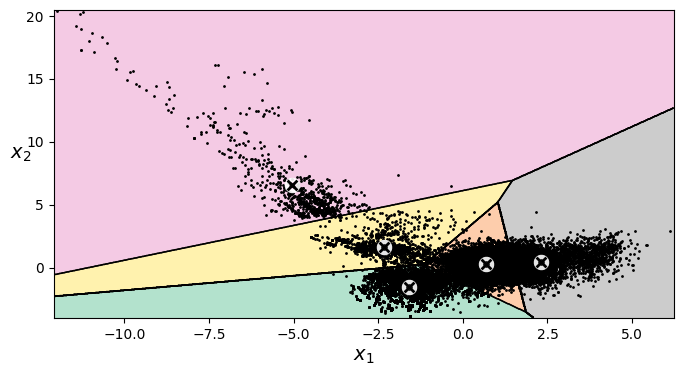

In [15]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_pca, X_pca)
plt.show()

In [16]:
kmeans_pca.transform(X_new)

array([[ 0.70048282,  3.6024316 ,  8.78216169,  3.42695739,  5.07383274],
       [ 3.68950233,  0.7720486 ,  8.5022214 ,  3.68073784,  1.098525  ],
       [ 2.36644019,  0.88457641,  7.80926376,  2.45954349,  2.5008727 ],
       [ 2.16302304,  1.10863736,  9.11957706,  3.65605718,  2.2415042 ],
       [ 2.95185473,  0.0796096 ,  8.52366254,  3.36595797,  1.56092372],
       [ 2.10154696,  2.36708043, 10.16562301,  4.59137094,  3.13083395],
       [ 2.76328514,  0.2496504 ,  8.24853879,  3.0431516 ,  1.86782675],
       [ 3.50936676,  0.72296338,  8.95945361,  3.96183015,  0.91157022],
       [ 1.07940539,  2.02044362,  9.02194818,  3.42545362,  3.34668676],
       [ 4.61925316,  1.76431545,  9.29783666,  4.7375794 ,  0.42221848]])

In [17]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="lloyd", max_iter=1, random_state=1)
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=1, random_state=1)
# Configuración del modelo K-Means con inicialización inteligente
kmeans_iter1 = KMeans(n_clusters=5, init="k-means++", n_init=3,
                    algorithm="elkan", max_iter=3, random_state=42)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=2, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="k-means++", n_init=2,
                    algorithm="elkan", max_iter=2, random_state=1)

# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=5,
#                      algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="k-means++", n_init=1,
                    algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X_pca)
kmeans_iter2.fit(X_pca)
kmeans_iter3.fit(X_pca)

KMeans(algorithm='elkan', max_iter=3, n_clusters=5, n_init=1, random_state=1)

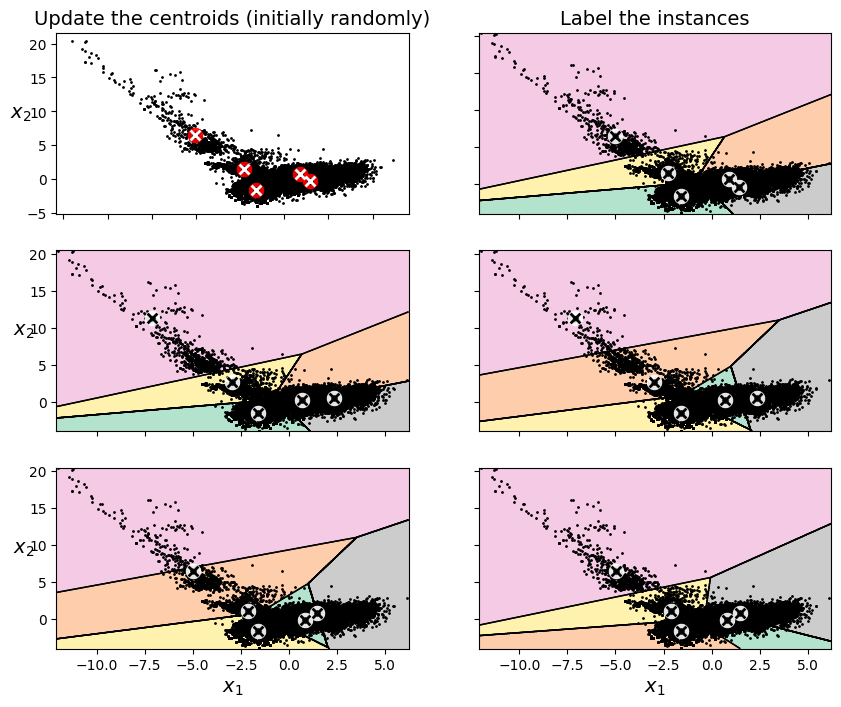

In [18]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_pca)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X_pca, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X_pca, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X_pca, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X_pca, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X_pca, show_ylabels=False)

plt.show()

In [19]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

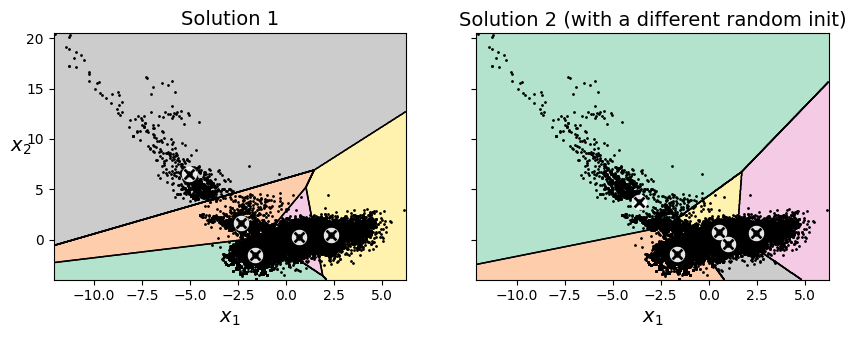

In [23]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                        algorithm="elkan", random_state=1)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=3,
                        algorithm="elkan", random_state=42)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X_pca, "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [24]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                            algorithm="elkan", random_state=11)
kmeans_rnd_10_inits.fit(X_pca)

KMeans(algorithm='elkan', init='random', n_clusters=5, n_init=10,
       random_state=11)

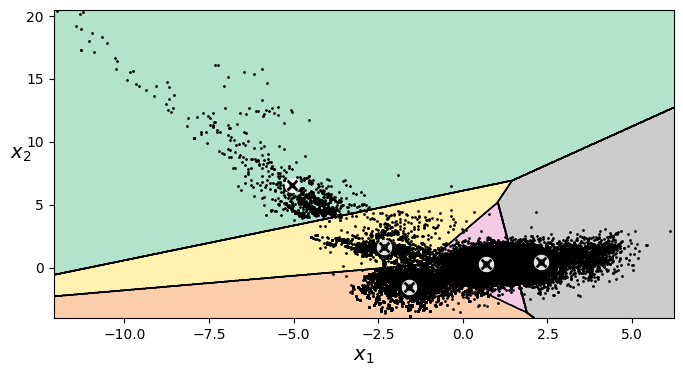

In [25]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X_pca)
plt.show()

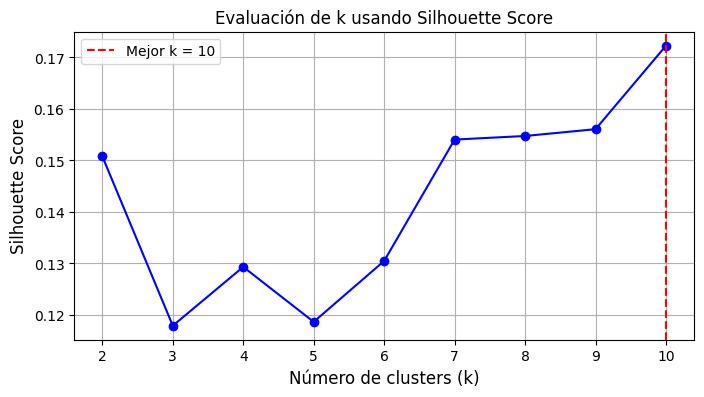

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df_scaled  # Asegúrate de que X esté definido

# Evaluar Silhouette Score para un rango de k
k_range = range(2, 11)  # Puedes ajustar el rango según tu interés

# Entrenar modelos KMeans con diferentes k
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in k_range]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

# Graficar Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("Número de clusters (k)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Evaluación de k usando Silhouette Score")
best_k = k_range[np.argmax(silhouette_scores)]
plt.axvline(best_k, color='red', linestyle='--', label=f"Mejor k = {best_k}")
plt.legend()
plt.grid(True)
plt.show()



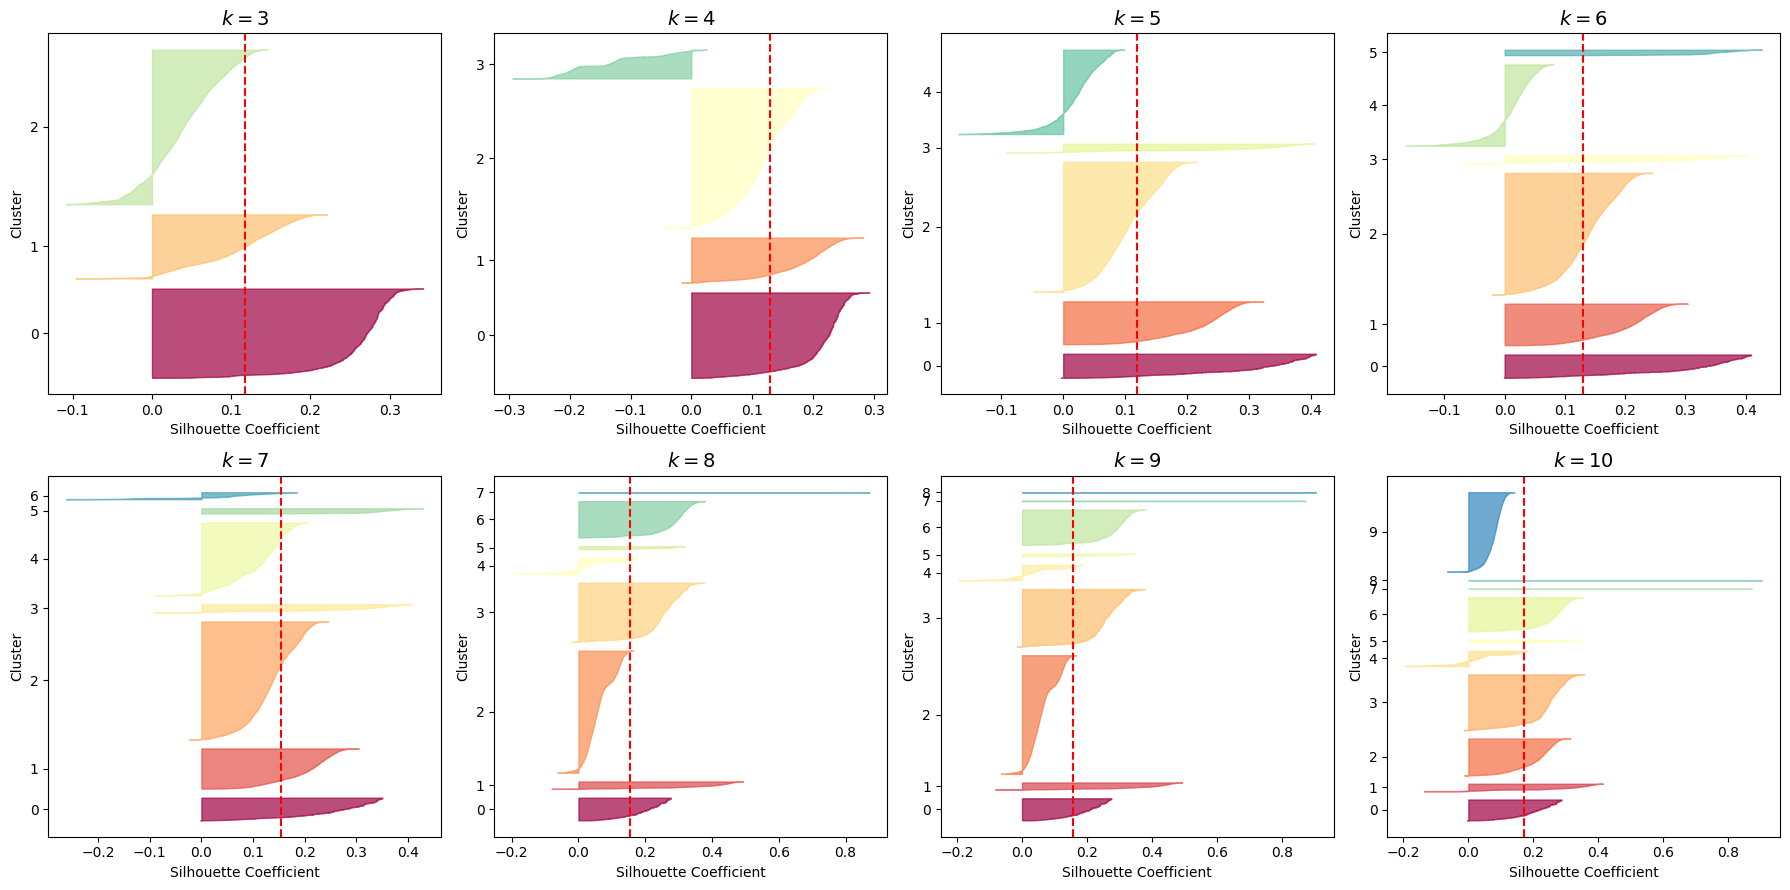

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np

# Ajusta tu matriz de datos normalizada
X = df_scaled

# Define el rango de K
k_values = range(3, 11)

# Fit de modelos y cálculo de silueta
kmeans_per_k = []
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    kmeans_per_k.append(kmeans)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Preparar figura con subplots dinámicos
n_rows = 2
n_cols = 4
plt.figure(figsize=(18, 9))

for idx, k in enumerate(k_values):
    plt.subplot(n_rows, n_cols, idx + 1)

    y_pred = kmeans_per_k[idx].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                        facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel("Cluster")
    plt.xlabel("Silhouette Coefficient")
    plt.axvline(x=silhouette_scores[idx], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=14)

plt.tight_layout()
plt.show()
